#Data Insertion

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks
import tensorflow.keras as keras
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/exoTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/exoTest.csv')

In [ ]:
test_data.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [ ]:
# Separate features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


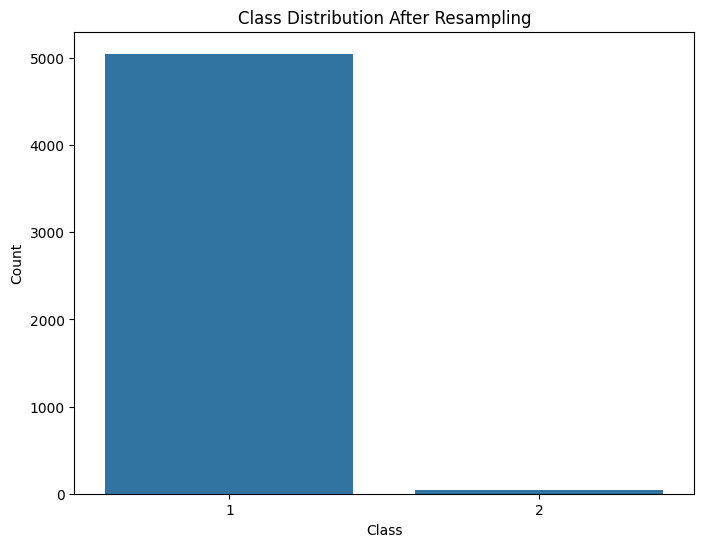

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='LABEL')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train

array([[ 93.85,  83.81,  20.1 , ...,  61.42,   5.08, -39.54],
       [-38.88, -33.83, -58.54, ...,   6.46,  16.  ,  19.93],
       [532.64, 535.92, 513.73, ..., -28.91, -70.02, -96.67],
       ...,
       [273.39, 278.  , 261.73, ...,  88.42,  79.07,  79.43],
       [  3.82,   2.09,  -3.29, ..., -14.55,  -6.41,  -2.55],
       [323.28, 306.36, 293.16, ..., -16.72, -14.09,  27.82]])

In [ ]:
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#SMOTE+OSS

In [ ]:
pipeline_smote_oss = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.3)),
    ('oss', OneSidedSelection(n_neighbors=5, n_seeds_S=2500)),
    #('tomek', TomekLinks(sampling_strategy='majority'))
])
X_train_smote_oss, y_train_smote_oss = pipeline_smote_oss.fit_resample(X_train_scaled, y_train)
#X_train_smote_tomek, y_train_smote_tomek = pipeline_smote_tomek.fit_resample(X_train_scaled, y_train)

unique, counts = np.unique(y_train_smote_oss, return_counts=True)
print('Train(SMOTE+OSS)', dict(zip(unique, counts)))

Train(SMOTE+OSS) {0: 2641, 1: 1515}


In [ ]:
pipeline_adasyn_oss = Pipeline([
     ('adasyn', ADASYN(sampling_strategy=0.3)),
     ('oss', OneSidedSelection(n_neighbors=5, n_seeds_S=2500)),
    #('tomek', TomekLinks(sampling_strategy='majority'))
])
#X_train_adasyn_tomek, y_train_adasyn_tomek = pipeline_adasyn_tomek.fit_resample(X_train_scaled, y_train)
X_train_adasyn_oss, y_train_adasyn_oss = pipeline_adasyn_oss.fit_resample(X_train_scaled, y_train)

unique, counts = np.unique(y_train_adasyn_oss, return_counts=True)
print('Train(ADASYN+OSS)', dict(zip(unique, counts)))

Train(ADASYN+OSS) {0: 2638, 1: 1504}


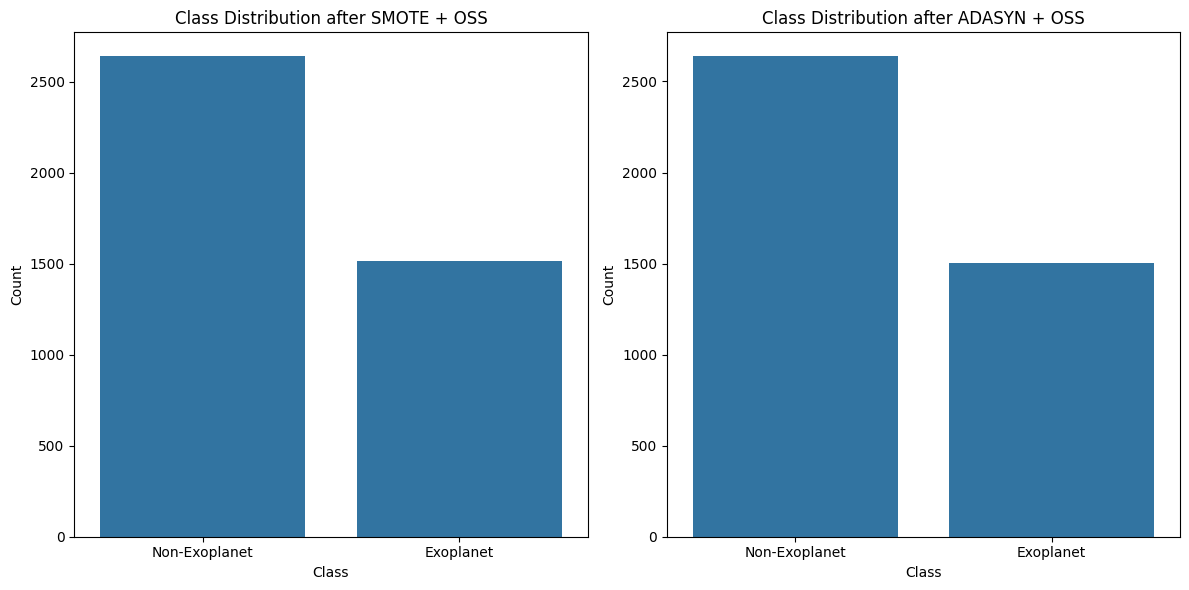

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train_smote_oss)
plt.title('Class Distribution after SMOTE + OSS')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Exoplanet', 'Exoplanet'])

# Plot the class distribution after ADASYN + TomekLinks
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_adasyn_oss)
plt.title('Class Distribution after ADASYN + OSS')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Exoplanet', 'Exoplanet'])

plt.tight_layout()
plt.show()

#Reshape

In [ ]:
class BalancedDataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, batch_size=128, class_weights=None):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.indices_0 = np.where(y == 0)[0]
        self.indices_1 = np.where(y == 1)[0]
        self.class_weights = class_weights if class_weights is not None else {0: 1.0, 1: 1.0}
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.y) / self.batch_size))

    def __getitem__(self, index):
        num_samples_0 = int(self.batch_size * self.class_weights[0] / (self.class_weights[0] + self.class_weights[1]))
        num_samples_1 = self.batch_size - num_samples_0

        indices_0_batch = np.random.choice(self.indices_0, num_samples_0, replace=len(self.indices_0) < num_samples_0)
        indices_1_batch = np.random.choice(self.indices_1, num_samples_1, replace=len(self.indices_1) < num_samples_1)

        batch_indices = np.concatenate([indices_0_batch, indices_1_batch])
        np.random.shuffle(batch_indices)
        return self.__data_generation(batch_indices)

    def on_epoch_end(self):
        np.random.shuffle(self.indices_0)
        np.random.shuffle(self.indices_1)

    def __data_generation(self, batch_indices):
        X_batch = self.X[batch_indices]
        y_batch = self.y[batch_indices]
        return X_batch, y_batch

In [ ]:
# Reshape the data for time series classification
X_train_smote_oss_reshaped = X_train_smote_oss.reshape(X_train_smote_oss.shape[0], X_train_smote_oss.shape[1], 1)
X_train_adasyn_oss_reshaped = X_train_adasyn_oss.reshape(X_train_adasyn_oss.shape[0], X_train_adasyn_oss.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

#CNN

In [ ]:
def build_cnn_model(input_shape, num_classes=1):
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        # keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling1D(pool_size=2),
        #keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.AUC()
        ]
    )

    return model


#FCN

In [ ]:
def build_fcn_model(input_shape, num_classes=1):
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=32, kernel_size=8, padding='same', activation='relu', input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.AUC()
        ]
    )

    return model


#Time CNN

In [ ]:
import tensorflow.keras as keras

def build_time_cnn_model(input_shape, num_classes=1):
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=32, kernel_size=7, padding='same', activation='relu', input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(pool_size=2),

        keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(pool_size=2),

        keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(pool_size=2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.AUC()
        ]
    )
    return model


#Training code

In [ ]:
def train_model(model, train_generator, val_generator, output_directory):
    # Callbacks
    model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=output_directory + 'best_model.hdf5', monitor='val_loss', save_best_only=True
    )
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )

    # Training
    history = model.fit(
        train_generator,
        epochs=100,
        validation_data=val_generator,
        callbacks=[model_checkpoint, early_stopping],
        verbose=1
    )

    # Load best model
    model.load_weights(output_directory + 'best_model.hdf5')

    return history, model

#Evaluation Code

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     y_pred_classes = np.argmax(y_pred, axis=1)
#     y_test_classes = np.argmax(y_test, axis=1)
#     print(classification_report(y_test_classes, y_pred_classes))
#     print(confusion_matrix(y_test_classes, y_pred_classes))

def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    results = model.evaluate(X_test, y_test, verbose=0)
    test_loss = results[0]
    test_accuracy = results[1]
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'AUC: {auc:.2f}')

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Exoplanet', 'Exoplanet'], yticklabels=['Non-Exoplanet', 'Exoplanet'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

#Accuracy, Loss Plot Code

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'{title} Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'{title} Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

#Train-Val Split

In [ ]:
X_train_split_smote, X_val_split_smote, y_train_split_smote, y_val_split_smote = train_test_split(X_train_smote_oss_reshaped, y_train_smote_oss, stratify=y_train_smote_oss, test_size=0.2, random_state=42)

X_train_split_adasyn, X_val_split_adasyn, y_train_split_adasyn, y_val_split_adasyn = train_test_split(X_train_adasyn_oss_reshaped, y_train_adasyn_oss, stratify=y_train_adasyn_oss, test_size=0.2, random_state=45)


In [ ]:
unique, counts = np.unique(y_train_split_smote, return_counts=True)
print('Train(SMOTE+OSS)', dict(zip(unique, counts)))
unique, counts = np.unique(y_val_split_smote, return_counts=True)
print('Val(SMOTE+OSS)', dict(zip(unique, counts)))
unique, counts = np.unique(y_train_split_adasyn, return_counts=True)
print('Train(Adasyn+OSS)', dict(zip(unique, counts)))
unique, counts = np.unique(y_val_split_adasyn, return_counts=True)
print('Val(Adasyn+OSS)', dict(zip(unique, counts)))

Train(SMOTE+OSS) {0: 2112, 1: 1212}
Val(SMOTE+OSS) {0: 529, 1: 303}
Train(Adasyn+OSS) {0: 2110, 1: 1203}
Val(Adasyn+OSS) {0: 528, 1: 301}


In [ ]:
train_generator_smote = BalancedDataGenerator(X_train_split_smote, y_train_split_smote, batch_size=128,class_weights={0: 1.57, 1: 2.72})
val_generator_smote = BalancedDataGenerator(X_val_split_smote, y_val_split_smote, batch_size=128, class_weights={0: 1.57, 1: 2.72})

train_generator_adasyn = BalancedDataGenerator(X_train_split_adasyn, y_train_split_adasyn, batch_size=128, class_weights={0: 1.57, 1: 2.72})
val_generator_adasyn = BalancedDataGenerator(X_val_split_adasyn, y_val_split_adasyn, batch_size=128, class_weights={0: 1.57, 1: 2.72})


#OHE

In [ ]:
print(X_train_split_smote.shape)
print(X_val_split_smote.shape)
print(y_train_split_smote.shape)
print(y_val_split_smote.shape)

print(X_train_split_adasyn.shape)
print(X_val_split_adasyn.shape)
print(y_train_split_adasyn.shape)
print(y_val_split_adasyn.shape)

(3324, 3197, 1)
(832, 3197, 1)
(3324,)
(832,)
(3313, 3197, 1)
(829, 3197, 1)
(3313,)
(829,)


#CNN + SMOTE

In [ ]:
cnn_smote_oss_model = build_cnn_model(input_shape=(X_train_smote_oss_reshaped.shape[1], 1), num_classes=1)
history_smote_oss, trained_cnn_smote_oss_model = train_model(cnn_smote_oss_model, train_generator_smote, val_generator_smote, 'cnn_smote_oss/')

cnn_adasyn_oss_model = build_cnn_model(input_shape=(X_train_adasyn_oss_reshaped.shape[1], 1), num_classes=2)
history_adasyn_oss, trained_cnn_adasyn_oss_model = train_model(cnn_adasyn_oss_model, train_generator_adasyn, val_generator_adasyn, 'cnn_adasyn_oss/')


Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 0.8899 - accuracy: 0.6124 - precision: 0.6453 - recall: 0.8770 - auc: 0.5249

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 10s 50ms/step - loss: 0.8691 - accuracy: 0.6153 - precision: 0.6455 - recall: 0.8863 - auc: 0.5283 - val_loss: 0.6249 - val_accuracy: 0.6549 - val_precision: 0.6499 - val_recall: 1.0000 - val_auc: 0.6823
Epoch 2/100
25/25 [==============================] - 1s 35ms/step - loss: 0.6217 - accuracy: 0.6556 - precision: 0.6504 - recall: 1.0000 - auc: 0.6220 - val_loss: 0.6157 - val_accuracy: 0.6576 - val_precision: 0.6517 - val_recall: 1.0000 - val_auc: 0.7315
Epoch 3/100
25/25 [==============================] - 1s 35ms/step - loss: 0.5916 - accuracy: 0.6647 - precision: 0.6577 - recall: 0.9937 - auc: 0.6796 - val_loss: 0.5769 - val_accuracy: 0.6523 - val_precision: 0.6514 - val_recall: 0.9837 - val_auc: 0.8319
Epoch 4/100
25/25 [==============================] - 1s 35ms/step - loss: 0.5456 - accuracy: 0.6884 - precision: 0.6793 - recall: 0.9732 - auc: 0.7848 - val_loss: 0.5209 - val_accuracy: 0.6758 - val_precision: 0.6680 - val_recall: 0.9817 - val

Test Accuracy: 99.30%
18/18 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       565
           1       0.57      0.80      0.67         5

    accuracy                           0.99       570
   macro avg       0.78      0.90      0.83       570
weighted avg       0.99      0.99      0.99       570

Precision: 0.57
Recall: 0.80
F1-Score: 0.67
AUC: 0.82


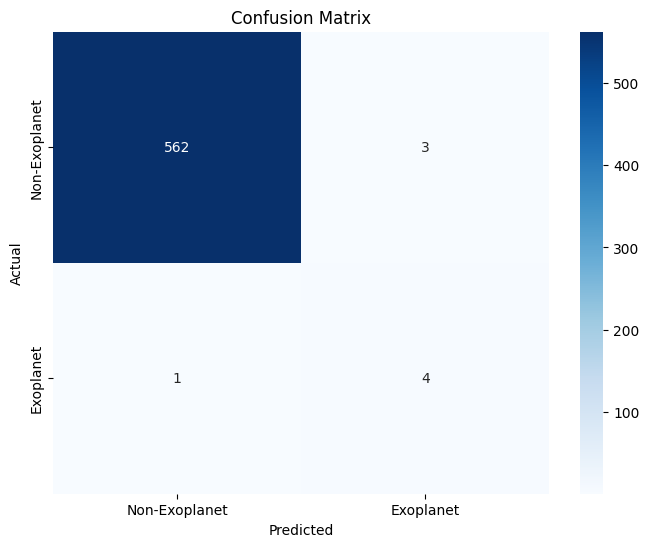

Test Accuracy: 99.82%
18/18 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       565
           1       1.00      0.80      0.89         5

    accuracy                           1.00       570
   macro avg       1.00      0.90      0.94       570
weighted avg       1.00      1.00      1.00       570

Precision: 1.00
Recall: 0.80
F1-Score: 0.89
AUC: 0.81


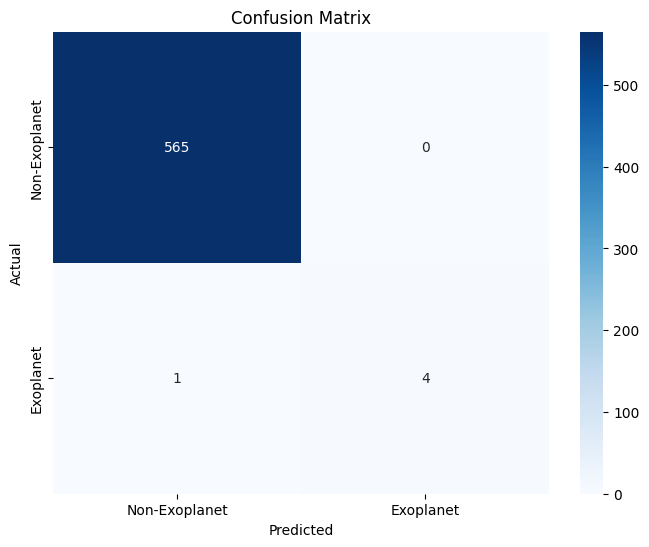

In [ ]:
# Evaluate CNN model trained on SMOTE + OSS data
evaluate_model(trained_cnn_smote_oss_model, X_test_reshaped, y_test)

# Evaluate CNN model trained on ADASYN + TomekLinks data
evaluate_model(trained_cnn_adasyn_oss_model, X_test_reshaped, y_test)


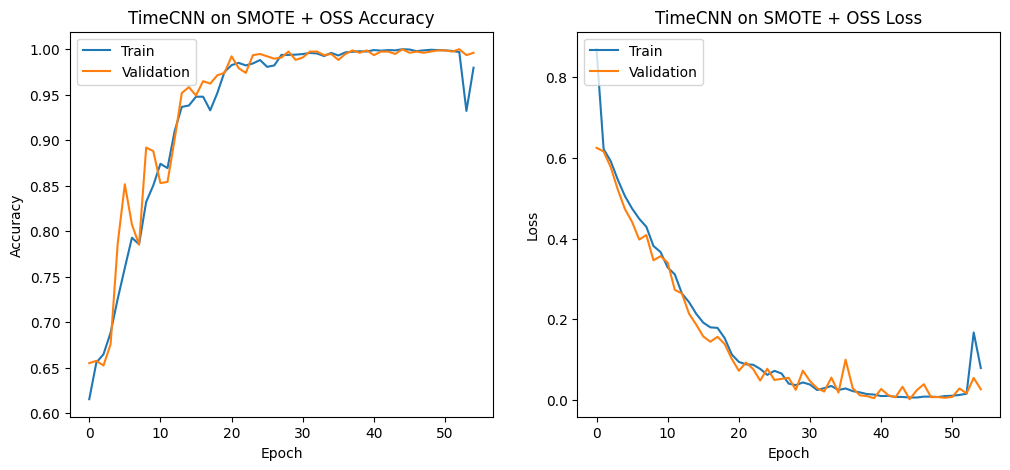

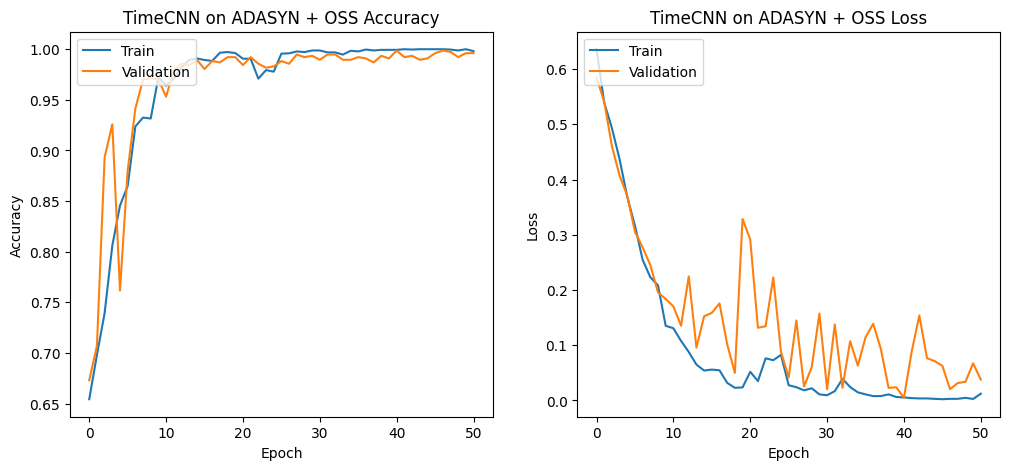

In [ ]:
# Plot history for CNN model trained on SMOTE + OSS data
plot_history(history_smote_oss, 'TimeCNN on SMOTE + OSS')

# Plot history for CNN model trained on ADASYN + OSS data
plot_history(history_adasyn_oss, 'TimeCNN on ADASYN + OSS')


In [ ]:
cnn_smote_oss_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3193, 32)          192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1596, 32)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1594, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 797, 64)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 51008)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
cnn_adasyn_oss_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3193, 32)          192       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1596, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 1594, 64)          6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 797, 64)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 51008)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Test Accuracy: 1.40%
18/18 [==============================] - 1s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.01       570

Precision: 0.01
Recall: 1.00
F1-Score: 0.02
AUC: 0.34


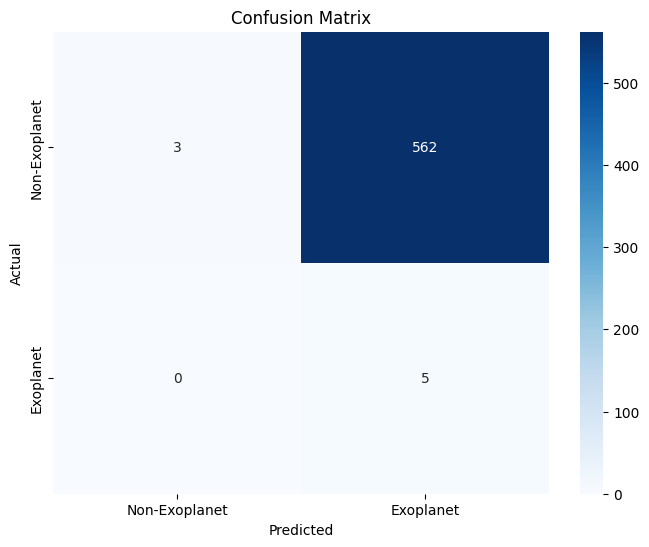

Test Accuracy: 25.79%
18/18 [==============================] - 1s 37ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.26      0.41       565
           1       0.00      0.40      0.01         5

    accuracy                           0.26       570
   macro avg       0.49      0.33      0.21       570
weighted avg       0.97      0.26      0.40       570

Precision: 0.00
Recall: 0.40
F1-Score: 0.01
AUC: 0.37


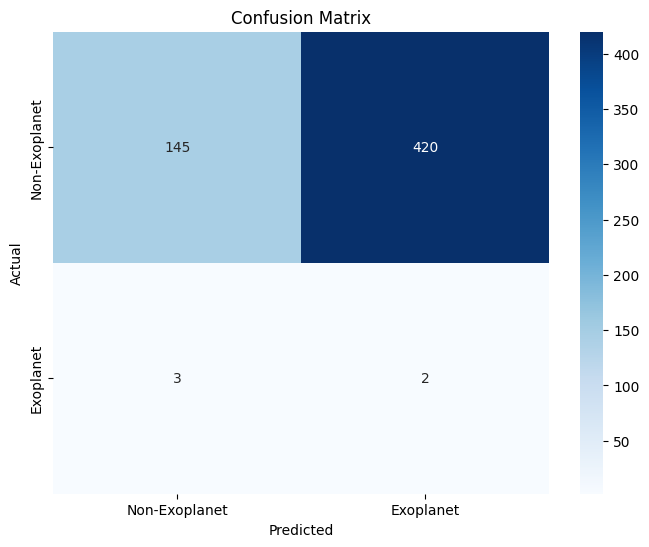

In [ ]:
# Evaluate FCN model trained on SMOTE + OSS data
evaluate_model(trained_lstm_smote_oss_model, X_test_reshaped, y_test)

# Evaluate FCN model trained on ADASYN + OSS data
evaluate_model(trained_lstm_adasyn_oss_model, X_test_reshaped, y_test)

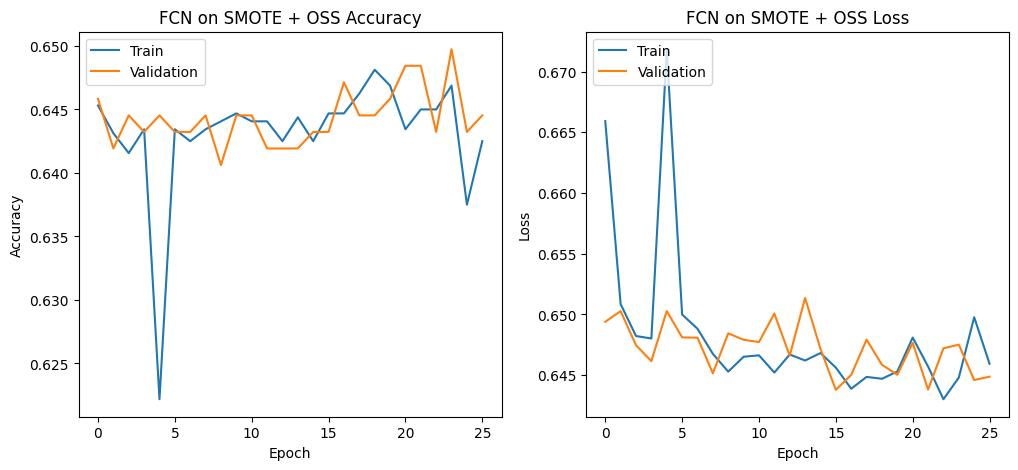

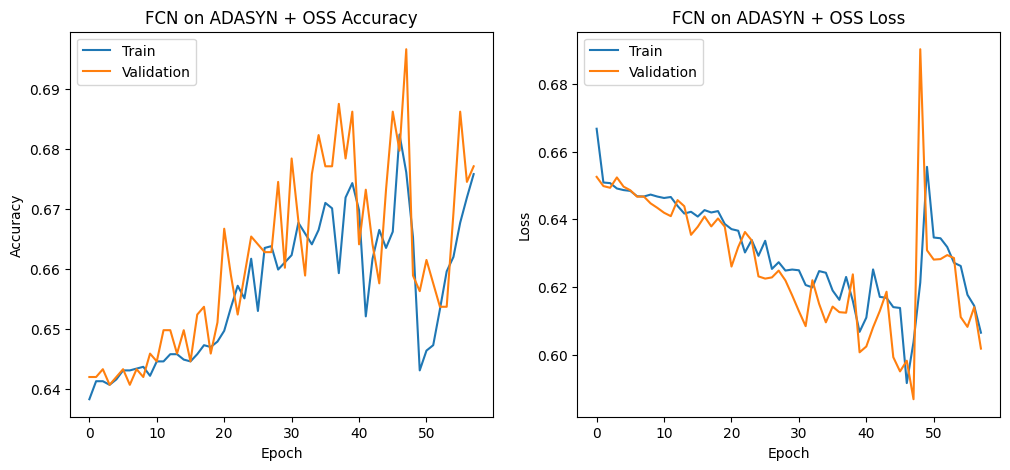

In [ ]:
# Plot history for CNN model trained on SMOTE + OSS data
plot_history(history_smote_oss_fcn, 'FCN on SMOTE + OSS')

# Plot history for CNN model trained on ADASYN + OSS data
plot_history(history_adasyn_oss_lstm, 'FCN on ADASYN + OSS')

# FCN

In [ ]:
print('FCN(SMOTE+OSS) Running')
fcn_smote_oss_model = build_fcn_model(input_shape=(X_train_smote_oss_reshaped.shape[1], 1), num_classes=1)
#history_smote_oss_fcn, trained_fcn_smote_oss_model = train_model(fcn_smote_oss_model, train_generator_smote, val_generator_smote, 'fcn_smote_oss/')

print('FCN(ADASYN+OSS) Running')
fcn_adasyn_oss_model = build_fcn_model(input_shape=(X_train_adasyn_oss_reshaped.shape[1], 1), num_classes=1)
#history_adasyn_oss_fcn, trained_fcn_adasyn_oss_model = train_model(fcn_adasyn_oss_model, train_generator_adasyn, val_generator_adasyn, 'fcn_adasyn_oss/')


FCN(SMOTE+OSS) Running
FCN(ADASYN+OSS) Running


In [ ]:
fcn_smote_oss_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3197, 32)          288       
                                                                 
 batch_normalization (Batch  (None, 3197, 32)          128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 3197, 64)          10304     
                                                                 
 batch_normalization_1 (Bat  (None, 3197, 64)          256       
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 3197, 32)          6176      
                                                                 
 batch_normalization_2 (Bat  (None, 3197, 32)          1

In [ ]:
fcn_adasyn_oss_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3197, 32)          288       
                                                                 
 batch_normalization_3 (Bat  (None, 3197, 32)          128       
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           (None, 3197, 64)          10304     
                                                                 
 batch_normalization_4 (Bat  (None, 3197, 64)          256       
 chNormalization)                                                
                                                                 
 conv1d_5 (Conv1D)           (None, 3197, 32)          6176      
                                                                 
 batch_normalization_5 (Bat  (None, 3197, 32)         

Test Accuracy: 0.88%
18/18 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.00      0.50      0.01       570
weighted avg       0.00      0.01      0.00       570

Precision: 0.01
Recall: 1.00
F1-Score: 0.02
AUC: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


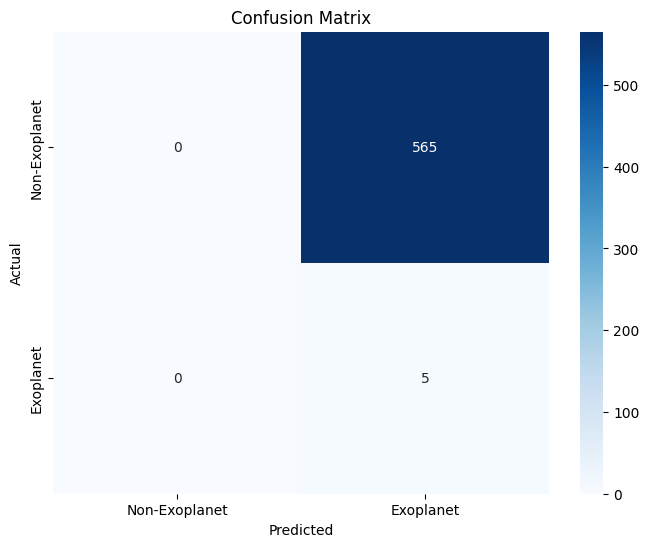

Test Accuracy: 1.05%
18/18 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       565
           1       0.01      1.00      0.02         5

    accuracy                           0.01       570
   macro avg       0.50      0.50      0.01       570
weighted avg       0.99      0.01      0.00       570

Precision: 0.01
Recall: 1.00
F1-Score: 0.02
AUC: 0.22


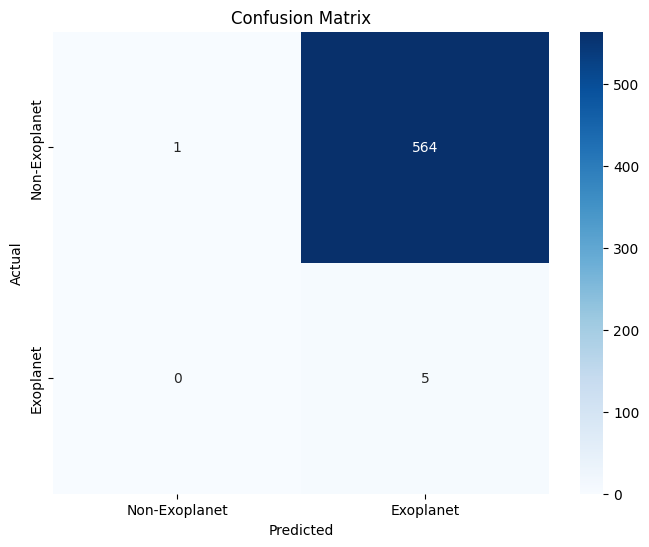

In [ ]:
Z# Evaluate FCN model trained on SMOTE + OSS data
evaluate_model(trained_fcn_smote_oss_model, X_test_reshaped, y_test)

# Evaluate FCN model trained on ADASYN + OSS data
evaluate_model(trained_fcn_adasyn_oss_model, X_test_reshaped, y_test)

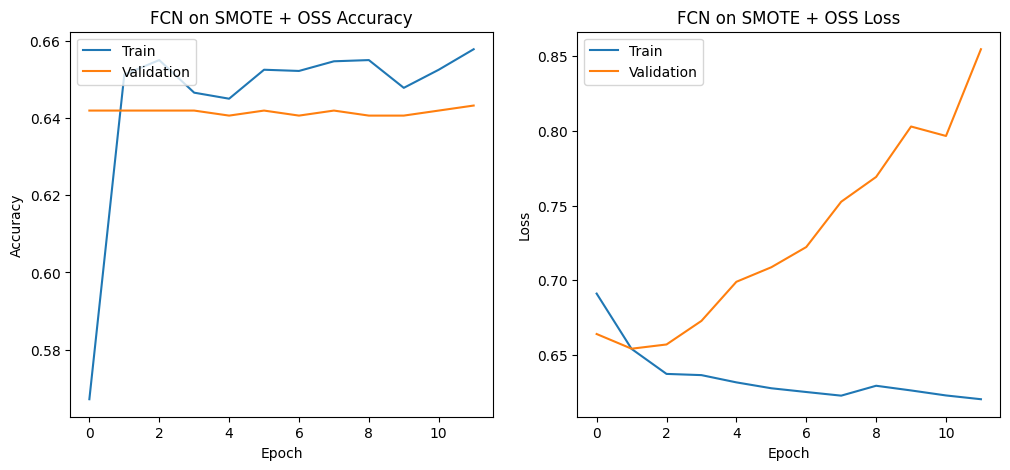

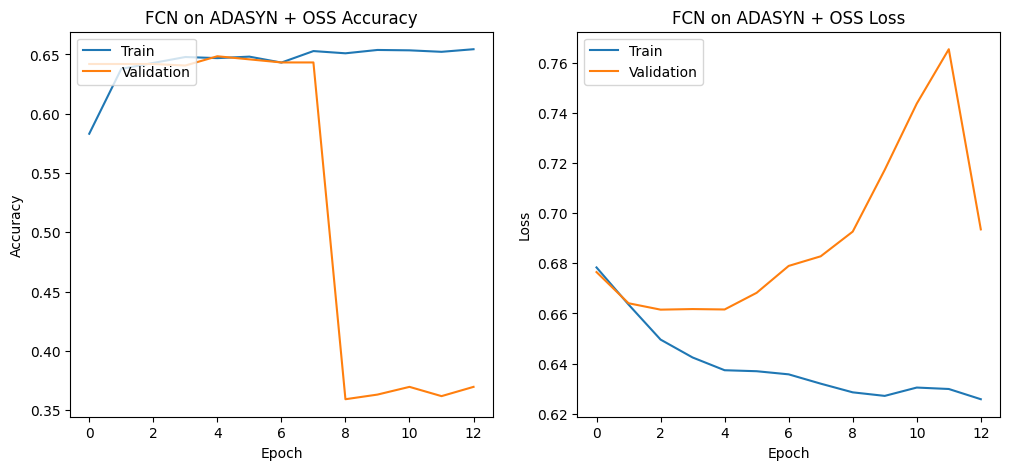

In [ ]:
# Plot history for CNN model trained on SMOTE + OSS data
plot_history(history_smote_oss_fcn, 'FCN on SMOTE + OSS')

# Plot history for CNN model trained on ADASYN + OSS data
plot_history(history_adasyn_oss_fcn, 'FCN on ADASYN + OSS')

#Resnet

In [ ]:
print('ResNet(SMOTE+OSS) Running')
resnet_smote_oss_model = build_resnet_model(input_shape=(X_train_smote_oss_reshaped.shape[1], 1), num_classes=1)
history_smote_oss_resnet, trained_resnet_smote_oss_model = train_model(resnet_smote_oss_model, train_generator_smote, val_generator_smote, 'resnet_smote_oss/')

print('ResNet(ADASYN+OSS) Running')
resnet_adasyn_oss_model = build_resnet_model(input_shape=(X_train_adasyn_oss_reshaped.shape[1], 1), num_classes=1)
history_adasyn_oss_resnet, trained_resnet_adasyn_oss_model = train_model(resnet_adasyn_oss_model, train_generator_adasyn, val_generator_adasyn, 'resnet_adasyn_oss/')


ResNet(SMOTE+OSS) Running
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 29s 871ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 20s 815ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 3/100
25/25 [==============================] - 20s 805ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 4/100
25/25 [==============================] - 20s 808ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 5/100
25/25 [==============================] - 20s 821ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 6/100
25/25 [==============================] - 20s 817ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 7/100
25/25 [==============================] - 20s 811ms/step - loss: 0.0000e+00 - accuracy: 0.6406 - val_loss: 0.0000e+00 - val_accuracy: 0.6406
Epoch 8/100
25/25 [==============================] - 20s 811ms/step - loss: 0.0000e+00 - accuracy: 0

KeyboardInterrupt: 

In [ ]:
 # Evaluate Resnet model trained on SMOTE + OSS data
evaluate_model(trained_resnet_smote_oss_model, X_test_reshaped, y_test)

# Evaluate ResNet model trained on ADASYN + OSS data
evaluate_model(trained_resnet_adasyn_oss_model, X_test_reshaped, y_test)

In [ ]:
# Plot history for CNN model trained on SMOTE + OSS data
plot_history(history_smote_oss_resnet, 'ResNet on SMOTE + OSS')

# Plot history for CNN model trained on ADASYN + OSS data
plot_history(history_adasyn_oss_resnet, 'ResNet on ADASYN + OSS')


#TimeCNN

In [ ]:
print('TimeCnn(SMOTE+OSS) Running')
timeCNN_smote_oss_model = build_time_cnn_model(input_shape=(X_train_smote_oss_reshaped.shape[1], 1), num_classes=1)
#history_smote_oss_timecnn, trained_timeCNN_smote_oss_model = train_model(timeCNN_smote_oss_model, train_generator_smote, val_generator_smote, 'timeCNN_smote_oss/')

print('TimeCnn(ADASYN+OSS) Running')
timeCNN_adasyn_oss_model = build_time_cnn_model(input_shape=(X_train_adasyn_oss_reshaped.shape[1], 1), num_classes=1)
#history_adasyn_oss_timecnn, trained_timeCNN_adasyn_oss_model = train_model(timeCNN_adasyn_oss_model, train_generator_smote, val_generator_smote, 'timeCNN_adasyn_oss/')


TimeCnn(SMOTE+OSS) Running
TimeCnn(ADASYN+OSS) Running


In [ ]:
timeCNN_smote_oss_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 3197, 32)          256       
                                                                 
 batch_normalization_6 (Bat  (None, 3197, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 1598, 32)          0         
 D)                                                              
                                                                 
 conv1d_7 (Conv1D)           (None, 1598, 64)          10304     
                                                                 
 batch_normalization_7 (Bat  (None, 1598, 64)          256       
 chNormalization)                                                
                                                      

In [ ]:
timeCNN_adasyn_oss_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 3197, 32)          256       
                                                                 
 batch_normalization_9 (Bat  (None, 3197, 32)          128       
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1598, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 1598, 64)          10304     
                                                                 
 batch_normalization_10 (Ba  (None, 1598, 64)          256       
 tchNormalization)                                               
                                                      

Test Accuracy: 2.11%
18/18 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       565
           1       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.51      0.02       570
weighted avg       0.99      0.02      0.02       570

Precision: 0.01
Recall: 1.00
F1-Score: 0.02
AUC: 0.49


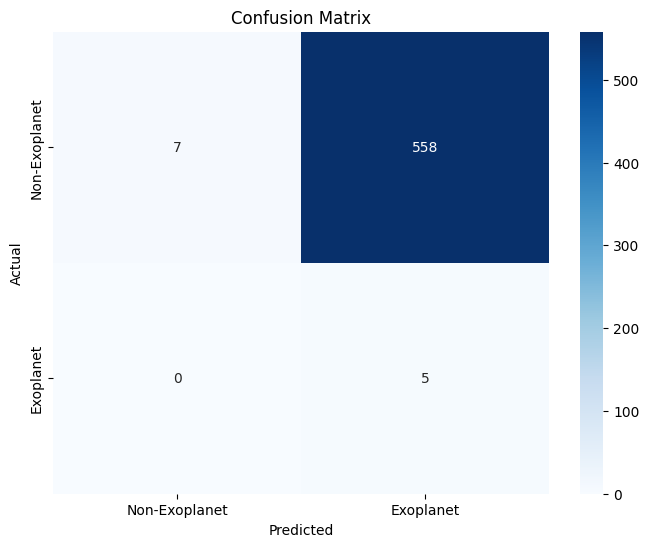

Test Accuracy: 1.75%
18/18 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       565
           1       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.50      0.02       570
weighted avg       0.99      0.02      0.02       570

Precision: 0.01
Recall: 1.00
F1-Score: 0.02
AUC: 0.45


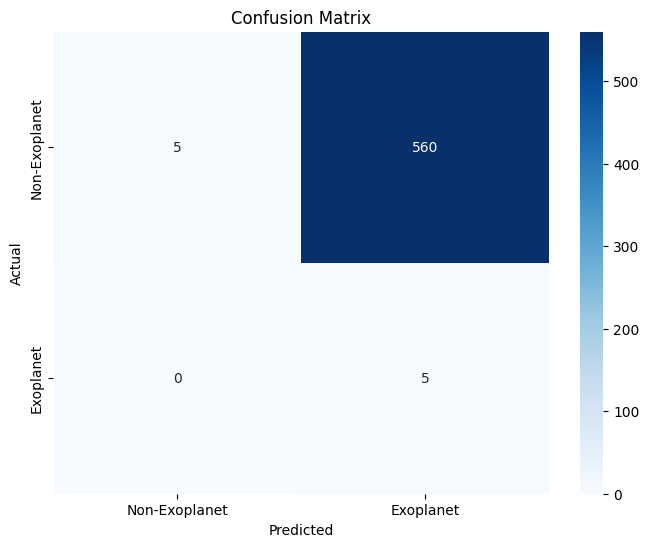

In [ ]:
# Evaluate Resnet model trained on SMOTE + OSS data
evaluate_model(trained_timeCNN_smote_oss_model, X_test_reshaped, y_test)

# Evaluate ResNet model trained on ADASYN + OSS data
evaluate_model(trained_timeCNN_adasyn_oss_model, X_test_reshaped, y_test)

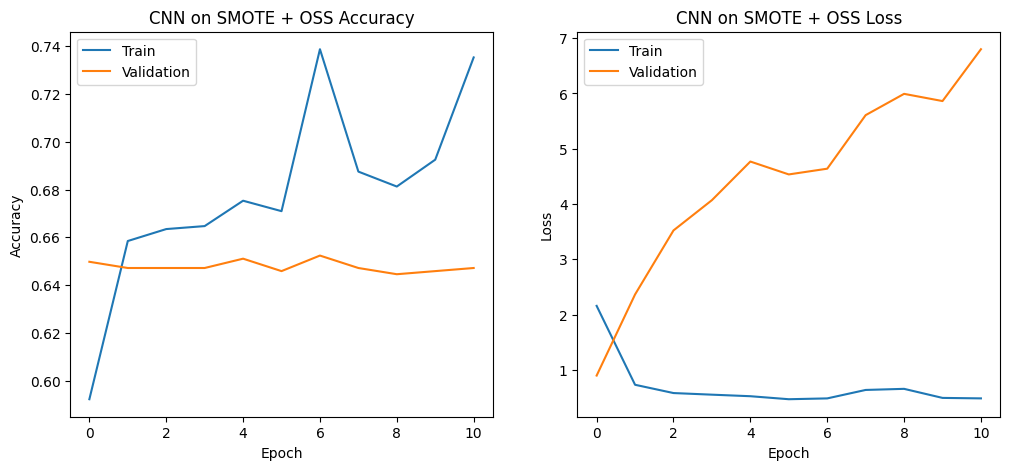

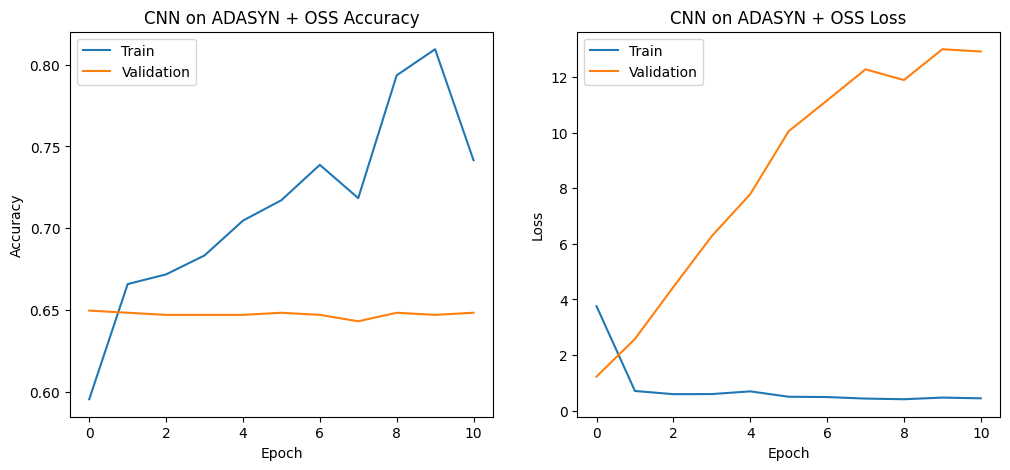

In [ ]:
# Plot history for CNN model trained on SMOTE + OSS data
plot_history(history_smote_oss_timecnn, 'CNN on SMOTE + OSS')

# Plot history for CNN model trained on ADASYN + OSS data
plot_history(history_adasyn_oss_timecnn, 'CNN on ADASYN + OSS')
